Using 21.2.06 activity as template

In [70]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
train_data = pd.read_csv("../titanic/train.csv")
test_data = pd.read_csv("../titanic/test.csv")

train_data = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)


# train1 = pd.get_dummies(train_data,columns=['Sex','Pclass','Embarked'])
# test1 = pd.get_dummies(test_data,columns=['Sex','Pclass','Embarked'])

# train = train1.dropna(subset=['Age'])
# test = test1.dropna(subset=['Age'])

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [72]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [73]:
# train_data.isnull().sum()

replacement_unknown_values = pd.DataFrame({
    "Unknwown Fare":train_data['Fare'].mode(),
    "Unknown Embark Point":train_data['Embarked'].mode(),
    "Unknown Age":train_data['Age'].median()})

replacement_unknown_values


,Unknwown Fare,Unknown Embark Point,Unknown Age
0,8.05,S,28.0


In [74]:
# Identify unknown (NaN) age and change to useable format
train_data["Age"] = train_data["Age"].fillna(28)
test_data["Age"] = test_data["Age"].fillna(28)

train_data["Embarked"] = train_data["Embarked"].fillna('S')
test_data["Embarked"] = train_data["Embarked"].fillna('S')

train_data["Fare"] = train_data["Fare"].fillna(8.05)
test_data["Fare"] = test_data["Fare"].fillna(8.05)

sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}

train_data['Sex'] = train_data['Sex'].map(sex_mapping)
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3


In [75]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [76]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [81]:
# train_data = train_data.apply(pd.to_numeric)
train_data = train_data.astype(float)

train_data.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked       float64
dtype: object

In [82]:
y = train_data["Survived"]

y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [83]:
X = train_data.drop(['PassengerId', 'Survived'], axis=1)
# X.head()
X.dtypes



Pclass      float64
Sex         float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked    float64
dtype: object

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [86]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.981/0.758
k: 3, Train/Test Score: 0.870/0.762
k: 5, Train/Test Score: 0.861/0.803
k: 7, Train/Test Score: 0.844/0.780
k: 9, Train/Test Score: 0.828/0.771
k: 11, Train/Test Score: 0.835/0.794
k: 13, Train/Test Score: 0.828/0.794
k: 15, Train/Test Score: 0.832/0.803
k: 17, Train/Test Score: 0.831/0.807
k: 19, Train/Test Score: 0.831/0.803
k: 21, Train/Test Score: 0.835/0.794
k: 23, Train/Test Score: 0.826/0.794
k: 25, Train/Test Score: 0.819/0.807
k: 27, Train/Test Score: 0.831/0.816


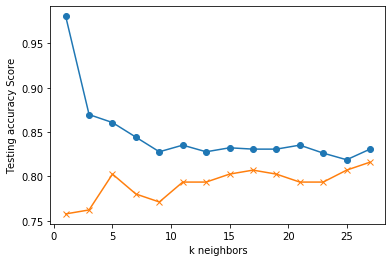

In [87]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 29, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 29, 2), train_scores, marker='o')
plt.plot(range(1, 29, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [88]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.803


In [89]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

In [90]:
# https://blog.cambridgespark.com/deploying-a-machine-learning-model-to-the-web-725688b851c7

predictions = knn.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')

R^2 score: -0.48
MAE score: 0.35
EVS score: -0.34


In [91]:
import pickle

In [92]:
with open('model/titanic_knn.pkl', 'wb') as file:
    pickle.dump(knn, file)